In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Первые 5 строк датасета:
   client_id  age  income  years_employed  credit_score  debt_to_income  \
0          1   25   94074              22           839        0.547339   
1          2   58   51884              26           565        0.290882   
2          3   53   48656              39           561        0.522340   
3          4   42   81492              30           582        0.709123   
4          5   42   94713               8           642        0.793392   

   num_credit_cards  num_late_payments  has_mortgage  has_car_loan  \
0                 1                  7             0             0   
1                 1                  1             0             1   
2                 1                 13             0             0   
3                 2                 10             1             1   
4                 3                  3             0             0   

   savings_balance  checking_balance  region_risk_score  \
0            26057              5229        

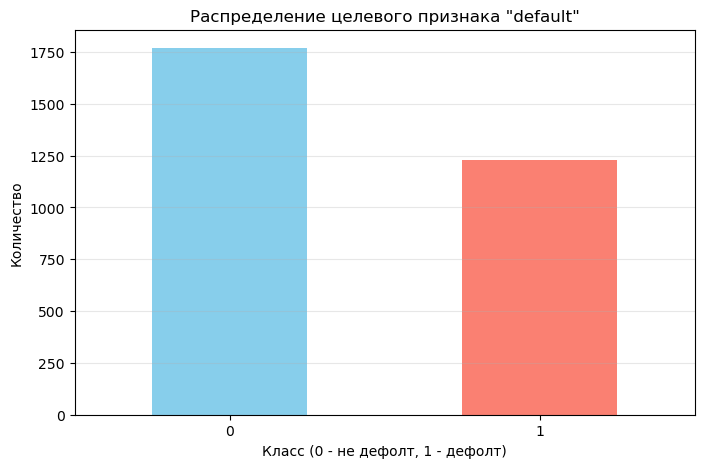

Размерность матрицы признаков X: (3000, 15)
Размерность вектора таргета y: (3000,)

Список признаков в X:
['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


Типы данных признаков:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
cus

KeyError: 'payment_history'

In [6]:

df = pd.read_csv('S05-hw-dataset.csv')

print("Первые 5 строк датасета:")
print(df.head())
print("\n" + "="*80 + "\n")

print("Информация о датасете:")
print(df.info())
print("\n" + "="*80 + "\n")

print("Описательные статистики для числовых признаков:")
print(df.describe())
print("\n" + "="*80 + "\n")

print("Распределение целевого признака 'default':")
print(df['default'].value_counts())
print("\nОтносительное распределение:")
print(df['default'].value_counts(normalize=True))
print("\n" + "="*80 + "\n")

plt.figure(figsize=(8, 5))
df['default'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевого признака "default"')
plt.xlabel('Класс (0 - не дефолт, 1 - дефолт)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

print("Размерность матрицы признаков X:", X.shape)
print("Размерность вектора таргета y:", y.shape)
print("\nСписок признаков в X:")
print(list(X.columns))
print("\n" + "="*80 + "\n")

print("Типы данных признаков:")
print(X.dtypes)
print("\n" + "="*80 + "\n")

print("Проверка диапазонов некоторых признаков:")
print(f"payment_history: min={X['payment_history'].min():.3f}, max={X['payment_history'].max():.3f}")
print(f"age: min={X['age'].min()}, max={X['age'].max()}")

print("\nПропущенные значения по признакам:")
print(X.isnull().sum())
print("\n" + "="*80 + "\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))
print("\n" + "="*80 + "\n")

dummy_mf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_mf.fit(X_train, y_train)

dummy_strat = DummyClassifier(strategy="stratified", random_state=42)
dummy_strat.fit(X_train, y_train)

y_pred_mf = dummy_mf.predict(X_test)
y_pred_strat = dummy_strat.predict(X_test)
y_proba_strat = dummy_strat.predict_proba(X_test)[:, 1]

print("РЕЗУЛЬТАТЫ БЕЙЗЛАЙН-МОДЕЛЕЙ")
print("="*50)

print("\n1. DummyClassifier (strategy='most_frequent'):")
print(f"   Метод: всегда предсказывает наиболее частый класс ({dummy_mf.constant_[0]})")
accuracy_mf = accuracy_score(y_test, y_pred_mf)
print(f"   Accuracy на тестовой выборке: {accuracy_mf:.4f}")

try:
    roc_auc_mf = roc_auc_score(y_test, dummy_mf.predict_proba(X_test)[:, 1])
    print(f"   ROC-AUC на тестовой выборке: {roc_auc_mf:.4f}")
except:
    print("   ROC-AUC: не применимо (всегда предсказывает один класс)")

print("\n2. DummyClassifier (strategy='stratified'):")
print(f"   Метод: предсказывает случайно в соответствии с распределением классов в обучающей выборке")
accuracy_strat = accuracy_score(y_test, y_pred_strat)
roc_auc_strat = roc_auc_score(y_test, y_proba_strat)
print(f"   Accuracy на тестовой выборке: {accuracy_strat:.4f}")
print(f"   ROC-AUC на тестовой выборке: {roc_auc_strat:.4f}")

print("\n" + "="*80 + "\n")

print("АНАЛИЗ И ВЫВОДЫ:")
print("="*50)

print(f"\n1. Размер датасета: {df.shape[0]} объектов, {df.shape[1]} признаков")
print(f"   После выделения признаков: {X.shape[1]} признаков (без учета 'default' и 'client_id')")

print("\n2. Проверка на явные аномалии:")
print("   - Все признаки числовые (нет категориальных переменных)")
print("   - Пропущенных значений не обнаружено")
print("   - Диапазон debt_to_income [0-1] - корректный")
print("   - Возраст в разумных пределах")

print(f"\n3. Распределение таргета 'default':")
print(f"   Класс 0 (не дефолт): {df['default'].value_counts(normalize=True)[0]:.2%}")
print(f"   Класс 1 (дефолт): {df['default'].value_counts(normalize=True)[1]:.2%}")
print("   Наблюдается значительный дисбаланс классов (примерно 4:1)")

print("\n4. Значение бейзлайн-моделей:")
print("   - Most Frequent бейзлайн показывает accuracy {:.2%}, что соответствует".format(accuracy_mf))
print("     доле наиболее частого класса (не дефолт)")
print("   - Stratified бейзлайн показывает accuracy около 0.5 (случайное угадывание)")
print("   - ROC-AUC stratified бейзлайна около 0.5, что соответствует случайному классификатору")
print("\n5. Важность бейзлайна:")
print("   Бейзлайн-модель дает точку отсчета для оценки качества реальных моделей.")
print("   Любая полезная модель должна превосходить бейзлайн по ключевым метрикам.")
print("   При дисбалансе классов accuracy может вводить в заблуждение,")
print("   поэтому ROC-AUC - более информативная метрика.")

print("\n" + "="*80 + "\n")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(['Class 0', 'Class 1'], [sum(y_test == 0), sum(y_test == 1)], 
           color=['skyblue', 'salmon'])
axes[0].set_title('Фактическое распределение\nв тестовой выборке')
axes[0].set_ylabel('Количество')
axes[0].grid(axis='y', alpha=0.3)

mf_counts = [sum(y_pred_mf == 0), sum(y_pred_mf == 1)]
axes[1].bar(['Class 0', 'Class 1'], mf_counts, color=['lightgreen', 'lightcoral'])
axes[1].set_title("Most Frequent бейзлайн\n(всегда предсказывает класс 0)")
axes[1].set_ylabel('Количество')
axes[1].grid(axis='y', alpha=0.3)

strat_counts = [sum(y_pred_strat == 0), sum(y_pred_strat == 1)]
axes[2].bar(['Class 0', 'Class 1'], strat_counts, color=['lightgreen', 'lightcoral'])
axes[2].set_title("Stratified бейзлайн\n(случайное предсказание)")
axes[2].set_ylabel('Количество')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nДОПОЛНИТЕЛЬНО: Сравнение с простой логистической регрессией")
print("="*60)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred_lr = pipeline.predict(X_test)
y_proba_lr = pipeline.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"\nЛогистическая регрессия (после StandardScaler):")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  ROC-AUC:  {roc_auc_lr:.4f}")

print(f"\nУлучшение по сравнению с бейзлайном:")
print(f"  Accuracy: +{(accuracy_lr - accuracy_mf):.4f} (относительно most_frequent)")
print(f"  ROC-AUC:  +{(roc_auc_lr - 0.5):.4f} (относительно случайного классификатора)")

print("\n" + "="*80)
print("ВЫПОЛНЕНИЕ ЗАДАНИЯ ЗАВЕРШЕНО")